In [1]:
# Import necessary Libraries
import sys, platform, os
print(sys.version)
print("--"* 60)
print("sys.platform   :", sys.platform)
print("platform.system():", platform.system())  
print("os.name :", os.name)   
# print(sys.executable)
# print("--"* 60)
print("Current directory:", os.getcwd())

3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]
------------------------------------------------------------------------------------------------------------------------
sys.platform   : win32
platform.system(): Windows
os.name : nt
Current directory: C:\Users\alkas\Downloads\Cell_Cycle_updated_Files\Cell_Cycle_updated_Files\All_DATA_Code_Files


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from skimage import measure
from plot_utils import set_plot_style, set_spines_black
set_plot_style(dpi=100)

In [3]:
# ---------------
# Parameters
# ---------------
alpha1,alpha2,alpha3=0.3,3.0,3.0
beta1,beta2,beta3 = 3.0,1.0,1.0
K1,K2,K3 = 0.5,0.5,0.5
n1,n2,n3 = 8,8,8

# -------------------------
# Define the Vector field
# -------------------------
def f(z):
    x1, x2, x3 = z
    dx1 = alpha1 - beta1*x1*x3**n1/(K1**n1 + x3**n1)
    dx2 = alpha2*(1 - x2)*x1**n2/(K2**n2 + x1**n2) - beta2*x2
    dx3 = alpha3*(1 - x3)*x2**n3/(K3**n3 + x2**n3) - beta3*x3
    return np.array([dx1, dx2, dx3])

In [4]:
pts = 50
x1 = np.linspace(0,1,pts)
x2 = np.linspace(0,1,pts)
x3 = np.linspace(0,1,pts)
X1, X2, X3 = np.meshgrid(x1, x2, x3, indexing='ij')


In [5]:
# ---------------------------------------------------
# Derivatives on each grid
# ---------------------------------------------------
DX1 = alpha1 - beta1*X1*(X3**n1)/(K1**n1 + X3**n1)
DX2 = alpha2*(1 - X2)*(X1**n2)/(K2**n2 + X1**n2) - beta2*X2
DX3 = alpha3*(1 - X3)*(X2**n3)/(K3**n3 + X2**n3) - beta3*X3

In [6]:
# ---------------------------------------------------
# Isosurface at level=0
# ---------------------------------------------------
verts1, faces1, _, _ = measure.marching_cubes(DX1, level=0.0)
verts2, faces2, _, _ = measure.marching_cubes(DX2, level=0.0)
verts3, faces3, _, _ = measure.marching_cubes(DX3, level=0.0)

# Rescale to [0,1] in each dimension
scale = np.array([1/(pts-1), 1/(pts-1), 1/(pts-1)])
verts1 = verts1*scale
verts2 = verts2*scale
verts3 = verts3*scale

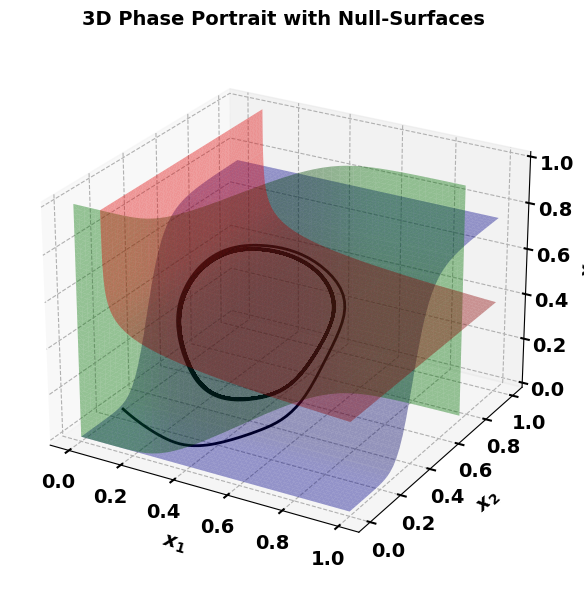

In [7]:
# ----------
# Plot
# -----------
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection='3d')

# 6a) Trajectory
t_eval = np.linspace(0,50,2000)
sol = solve_ivp(lambda t,z: f(z), [0,50], [0.1,0.1,0.1], t_eval=t_eval)
ax.plot(sol.y[0], sol.y[1], sol.y[2], 'k', lw=2)

# 6b) Null‐surfaces
ax.plot_trisurf(
    verts1[:,0], verts1[:,1], faces1, verts1[:,2],
    color='red',   alpha=0.4, linewidth=0
)
ax.plot_trisurf(
    verts2[:,0], verts2[:,1], faces2, verts2[:,2],
    color='green', alpha=0.4, linewidth=0
)
ax.plot_trisurf(
    verts3[:,0], verts3[:,1], faces3, verts3[:,2],
    color='blue',  alpha=0.4, linewidth=0
)

# 6c) Labels & styling
ax.set_xlabel('$x_1$', fontsize=14, labelpad=8)
ax.set_ylabel('$x_2$', fontsize=14, labelpad=8)
ax.set_zlabel('$x_3$', fontsize=14, labelpad=8)
ax.set_title('3D Phase Portrait with Null‐Surfaces', fontsize=14)

# Set a viewing angle similar to your reference
ax.view_init(elev=25, azim=-60)

plt.savefig("Plots_2/CDK1_Plk1_APC_Null_surfaces.pdf", bbox_inches="tight")
plt.show()


In [8]:
##########################################################################################################################################